In [125]:
import pandas as pd
import numpy as np

import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
X = pd.get_dummies(df)

In [12]:
del X['HeartDisease']
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [13]:
Y = df['HeartDisease']

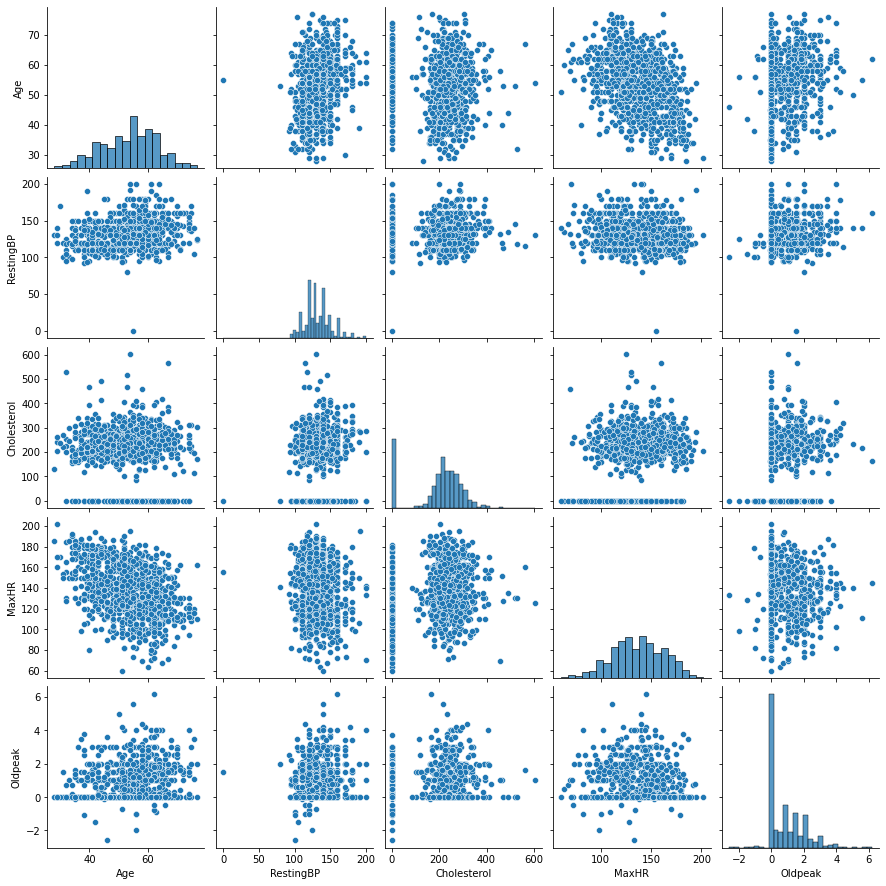

In [17]:
sns.pairplot(X[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

<AxesSubplot:>

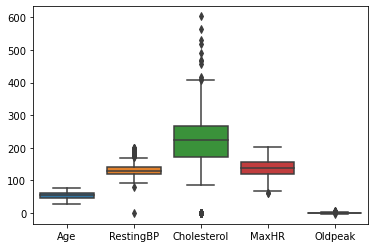

In [83]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
sns.boxplot(data = X[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [48]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.86      0.85        77
     class 1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [62]:
clf_RF = RandomForestClassifier(n_estimators = 40, max_depth=4, random_state=0)
clf_RF.fit(X_train, Y_train)
Y_pred = clf_RF.predict(X_test)

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.87      0.85        77
     class 1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



<AxesSubplot:title={'center':'feature_importances'}>

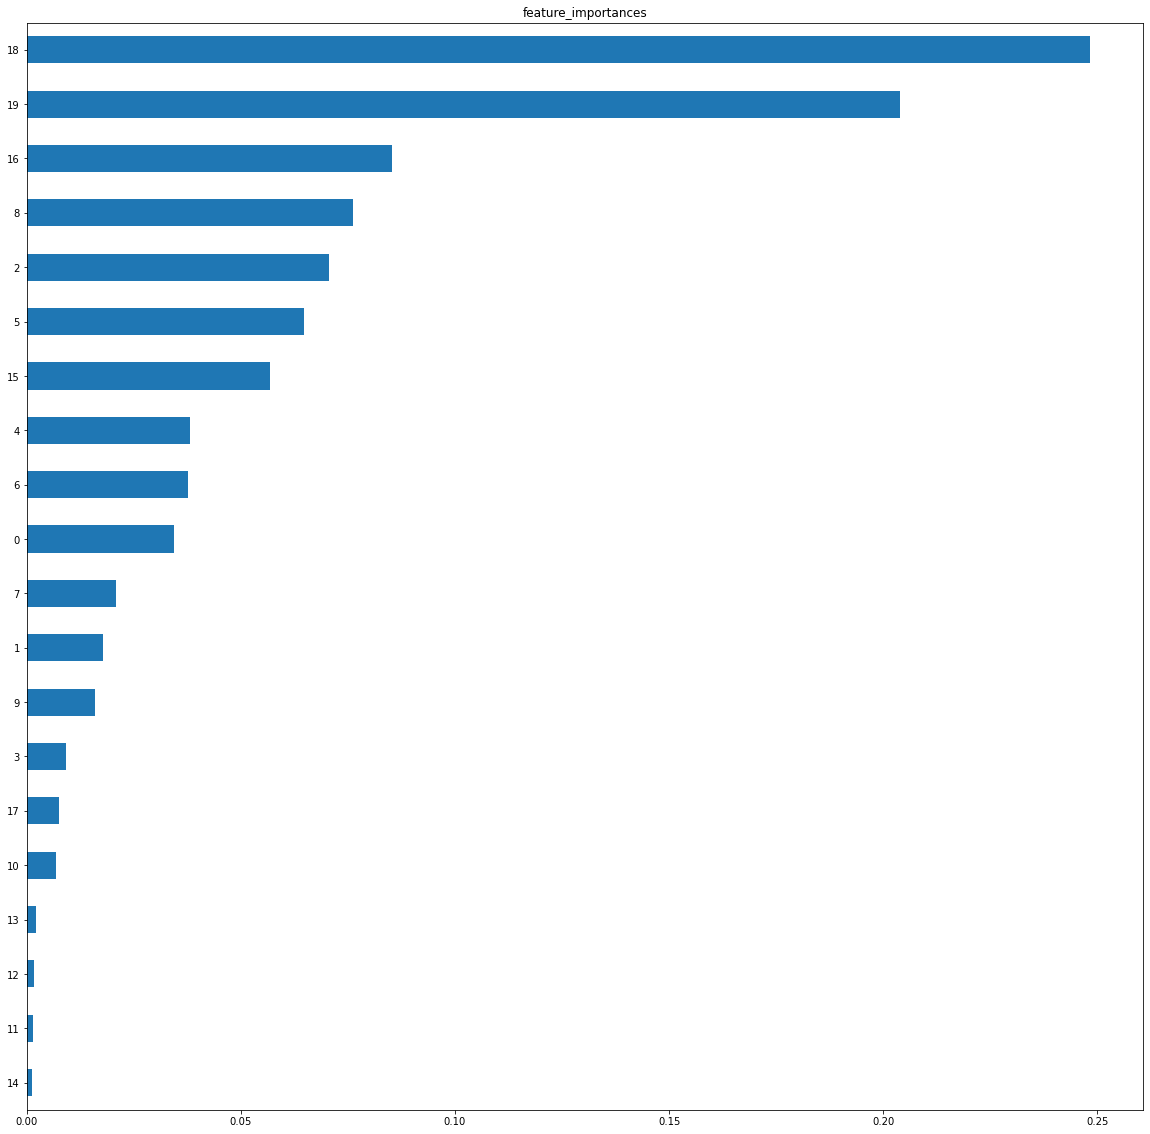

In [108]:
df_ = pd.DataFrame()
df_['parameters'] = clf_RF.feature_importances_
plt.figure(figsize=(20, 20))
df_['parameters'].sort_values(ascending = True).plot(kind='barh', title='feature_importances', legend = False)

In [123]:
clf_DF = BaggingClassifier(n_estimators=5, random_state=0)
clf_DF.fit(X_train, Y_train)
Y_pred_ = clf_DF.predict(X_test)

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred_, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.91      0.83        77
     class 1       0.92      0.79      0.85       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.86      0.84      0.84       184



In [130]:
estimators = [('dt', DecisionTreeClassifier(max_depth=4, random_state=42)), 
              ('rf', RandomForestClassifier(n_estimators = 40, max_depth=4, random_state=0)),
              ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
clf_stac = StackingClassifier(estimators=estimators)
                              
clf_stac.fit(X_train, Y_train)
Y_pred_stac = clf_stac.predict(X_test)

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred_stac, target_names=target_names))

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

     class 0       0.80      0.87      0.83        77
     class 1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


вывод: модели на основе дерева решений и случайного леса обучились примерно с одинаковым качеством. Бегинг на дереве решений обучился хуже, чем стекинг на композиции решающего дерева-случайного леса-метода опорых векторов.